In [1]:
import os, sys
import jsonlines
import pandas as pd
from collections import Counter

ModuleNotFoundError: No module named 'jsonlines'

In [2]:
!pwd

/Users/sopagna/Workspace/Data/cc-202433


In [7]:
filename = [os.path.join("data_202433/extracted_data/", name) for name in os.listdir("data_202433/extracted_data/")]

In [8]:
filename

['data_202433/extracted_data/1042-cc-wet.paths.jsonl',
 'data_202433/extracted_data/2357-cc-wet.paths.jsonl',
 'data_202433/extracted_data/2495-cc-wet.paths.jsonl',
 'data_202433/extracted_data/1780-cc-wet.paths.jsonl',
 'data_202433/extracted_data/765-cc-wet.paths.jsonl',
 'data_202433/extracted_data/836-cc-wet.paths.jsonl',
 'data_202433/extracted_data/3696-cc-wet.paths.jsonl',
 'data_202433/extracted_data/1728-cc-wet.paths.jsonl',
 'data_202433/extracted_data/4217-cc-wet.paths.jsonl',
 'data_202433/extracted_data/3154-cc-wet.paths.jsonl',
 'data_202433/extracted_data/1290-cc-wet.paths.jsonl',
 'data_202433/extracted_data/275-cc-wet.paths.jsonl',
 'data_202433/extracted_data/2185-cc-wet.paths.jsonl',
 'data_202433/extracted_data/2647-cc-wet.paths.jsonl',
 'data_202433/extracted_data/1552-cc-wet.paths.jsonl',
 'data_202433/extracted_data/2914-cc-wet.paths.jsonl',
 'data_202433/extracted_data/3444-cc-wet.paths.jsonl',
 'data_202433/extracted_data/1238-cc-wet.paths.jsonl',
 'data_202433

In [9]:
def get_jsonl_from_file(filename):
    with jsonlines.open(filename) as file:
        return [data for data in file]

In [10]:
data = []
for file in filename:
    data.extend(get_jsonl_from_file(file))

In [11]:
len(data)

156598

In [12]:
with jsonlines.open("jsonl_202433.jsonl", "w") as file:
    file.write_all(data)

In [7]:
with jsonlines.open("jsonl_202433.jsonl") as reader:
    data = [obj for obj in reader]

In [25]:
data[2]

{'content': 'ប្រភេទផលិតផលនៃកាបោនកាបូនអុបទិចយើងជាអ្នកឯកទេសផលិតពីប្រទេសចិនអ្នកផ្គត់ផ្គង់ផលិតផលកាបូនខ្សែក្រវាត់ / រោងចក្រផលិតផលិតផលដែលមានគុណភាពខ្ពស់នៃកាបោនហ្វាយអឹមឌីនិងការផលិតយើងមានសេវាកម្មបន្ទាប់ពីការលក់និងជំនួយផ្នែកបច្ចេកទេសដ៏ល្អឥតខ្ចោះ។ មើលទៅមុខដើម្បីកិច្ចសហប្រតិបត្តិការរបស់អ្នក!\nView as\nការវេចខ្ចប់ជាតិកាបូន\nសរសៃអំបោះដបខ្ចប់ពីសរសៃកាបូនដ៍ជាប់ៗគ្នាយ៉ាងរឹងមាំដែលទន់ភ្លន់ដោយសារធាតុរំអិលដែលមានកម្មសិទ្ធិនិងភាគល្អិតក្រាហ្វិចដែលបំពេញដោយការចាក់ប្រេងរំអិលបំពេញមុខងារជាប្រេងរំអិលដែលដាច់នៅក្នុងនិងទប់ស្កាត់ការលេចធ្លាយ។\nអាន\u200bបន្ថែម ផ្ញើការសាកសួរ\nការវេចខ្ចប់ជាតិកាបូនដែលមានជាតិកាល់ស្យូម\nជាតិសរសៃដែលមានជាតិកាបូណាតដែលមានសារធាតុប្រូតេអ៊ីន PTFE ដែលមានភាគល្អិតក្រាហ្វីត។ ការវេចខ្ចប់មានការបញ្ចេញទឹករំអិលខ្លួនឯង។\nអាន\u200bបន្ថែម ផ្ញើការសាកសួរ\nការវេចខ្ចប់ជាតិកាបូន\nសារធាតុសរសៃកាបូនដែលខ្ចប់ពោរពេញដោយសារធាតុសរសៃសំយោគដែលបែកខ្ចាត់ខ្ចាយដែលស្រូបយកដោយ PTFE Silicone-oil-free ។ ជាតិសរសៃអុកស៊ីដមានកម្លាំងខ្លាំងនិងមានសីតុណ្ហភាពល្អល្អ PTFE ធ្វើឱ្យវេចខ្ចប់មានប្រេងរំអិលខ្លួនឯង។\nអាន\u200bបន្ថែម ផ្ញើការសាកសួរ\n1\nការសា

In [107]:
def get_uri(ungoliant_obj):
    return ungoliant_obj["warc_headers"]["warc-target-uri"]

def get_quality_waring(ungoliant_obj): 
    return ungoliant_obj["metadata"]["quality_warnings"]

def get_sentence_identification(ungoliant_obj):
    return [lang["label"] if lang is not None else None for lang in ungoliant_obj["metadata"]["sentence_identifications"]]

def get_domian_uri(text):
    uri = text.split("/")[2]
    if "www." in uri:
        return uri.split("www.")[1]
    return uri

In [11]:
df = pd.DataFrame()

In [13]:
df["content"] = [con["content"] for con in data]

In [18]:
df["target_uri"] = [get_uri(con) for con in data]

In [20]:
df["quality_warning"] = [get_quality_waring(con) for con in data]

In [34]:
df["sentence_identification"] = [get_sentence_identification(con) for con in data]

In [35]:
df

,content,target_uri,quality_warning,sentence_identification
0,ក្រុមកីឡា​បាល់ទាត់​ជម្រើសជាតិ ក្រោម​អាយុ​២៣​ឆ្...,https://thmeythmey.com/?page=detail&id=68559,None,"[km, km, km, km, km, km]"
1,នៅក្នុងផ្នែកនេះនៃគេហទំព័រ អ្នកនឹងអាចស្វែងរកព័ត...,https://www.ccc-cambodia.org/kh/media-center/m...,[tiny],[km]
2,ប្រភេទផលិតផលនៃកាបោនកាបូនអុបទិចយើងជាអ្នកឯកទេសផល...,https://km.industrial-seals.com/Carbon-Fiber-P...,"[short_sentences, header, footer]","[km, en, km, km, km, km, km, km, km, km, km, N..."
3,English Vietnamese Chinese French German Indon...,https://vovworld.vn/km-KH/%E1%9E%9F%E1%9E%9A%E...,"[short_sentences, header, footer]","[en, None, km, km, None, km, km, km, km, None,..."
4,ក្រុមហ៊ុន សែលកាត បានសម្ពោធ​ដំណើរ​ការ​នៅ​ឆ្នាំ1...,https://www.cellcard.com.kh/kh/faqs_count_user...,"[short_sentences, header]","[km, km, km, km, km, km, km, km, km, km, en, k..."
...,...,...,...,...
156593,WordPress database error: [Disk full (/tmp/#sq...,https://cambodiaflashnews.com/2024/07/21/%E1%9...,"[short_sentences, footer]","[None, None, None, None, None, None, None, Non..."
156594,► BP អាចកាត់ក្តារ &មានគ្រឿងបន្លាស់គ្រប់មុខទាំង...,https://www.bpcambodia.com/product/k1285-%E1%9...,[tiny],"[km, km]"
156595,Open Access: កាលានុវត្តភាពសម្រាប់កម្ពុជា នៅក្ន...,https://salatraju.com/post/283,[short_sentences],"[km, km, km, km, km, km, km, km, km, km, km, k..."
156596,"Posted on ថ្ងៃ​ព្រហស្បតិ៍, 27 ខែ​កុម្ភៈ, 2020 ...",https://www.cpp.org.kh/details/186111,"[short_sentences, footer]","[km, km, km, km, km, km, km, km, km, km, km, k..."


In [61]:
df.content.describe()

count                                                156190
unique                                               131075
top       អ្វីៗទាំងអស់ដែលតម្កល់ទុកនៅក្នុង បណ្ណាល័យអេឡិចត...
freq                                                   2467
Name: content, dtype: object

In [68]:
df.drop_duplicates(subset=["target_uri"], keep="first", inplace=True)
df.drop_duplicates(subset=["content"], keep="first", inplace=True)

In [69]:
df[["content", "target_uri"]].describe()

,content,target_uri
count,131075,131075
unique,131075,131075
top,ក្រុមកីឡា​បាល់ទាត់​ជម្រើសជាតិ ក្រោម​អាយុ​២៣​ឆ្...,https://thmeythmey.com/?page=detail&id=68559
freq,1,1


In [70]:
df.to_parquet("extract.parquet")

In [71]:
!du -sh extract.parquet

563M	extract.parquet


In [79]:
df["quality_warning"].isnull().sum()

20082

In [108]:
domain = [get_domian_uri(uri) for uri in df["target_uri"].to_list()]

In [111]:
domain_freq = Counter(domain)

In [113]:
domain_freq.most_common()

[('khmer.voanews.com', 8254),
 ('airasia.com', 4885),
 ('thmeythmey.com', 2534),
 ('cpp.org.kh', 1993),
 ('freshnewsasia.com', 1949),
 ('dap-news.com', 1887),
 ('khmerpostasia.com', 1717),
 ('nokorwatnews.com', 1671),
 ('cambonomist.com', 1530),
 ('senate.gov.kh', 1484),
 ('m.freshnewsasia.com', 1450),
 ('csn-news.com', 1355),
 ('kh.cnv.org.kh', 1326),
 ('wmc.org.kh', 1192),
 ('opendevelopmentcambodia.net', 1002),
 ('km.wikipedia.org', 995),
 ('kh.cc-times.com', 985),
 ('cambodiaflashnews.com', 978),
 ('kohkong.gov.kh', 963),
 ('cen.com.kh', 934),
 ('kohsantepheapdaily.com.kh', 920),
 ('hellokrupet.com', 917),
 ('msrsport.com', 916),
 ('cambodiafinancialtimes.com', 907),
 ('hotnews-asia.com', 903),
 ('cbssport.com.kh', 903),
 ('oknha.news', 861),
 ('plovpit.com', 776),
 ('cafj.net', 773),
 ('myfmnews.com', 757),
 ('news.tv5cambodia.com', 722),
 ('postkhmer.com', 710),
 ('khmermanna.com', 648),
 ('truthcambodia.com', 640),
 ('knongsrok.com', 628),
 ('m.ti-kh.org', 602),
 ('xn--k2eafc4dm

In [120]:
unique_domain = pd.Series(list(domain_freq.keys()))

In [172]:
# unique_domain[unique_domain.str.contains("\.gov")].to_list()
# unique_domain[unique_domain.str.contains("\.org")]
# unique_domain[unique_domain.str.contains("\.edu")]
# unique_domain[unique_domain.str.contains("\.kh")]
unique_domain[unique_domain.str.contains("news")].count()

222

In [160]:
df[df.target_uri.str.contains("online.fines.vic.gov.au")]

,content,target_uri,quality_warning,sentence_identification
142740,នេះគឺជាព័ត៌មានសំខាន់។ ប្រសិនបើអ្នកមិនយល់ព័ត៌មា...,https://online.fines.vic.gov.au/translations/i...,[short_sentences],"[km, km, km, km, km, km, km, km, km, km, km, k..."


In [163]:
df.loc[142740].content

'នេះគឺជាព័ត៌មានសំខាន់។ ប្រសិនបើអ្នកមិនយល់ព័ត៌មាននេះទេ ឬចង់និយាយជាមួយនរណាម្នាក់អំពីការផាកពិន័យរបស់អ្នក សូមទូរស័ព្ទទៅអង្គភាពផាកពិន័យរដ្ឋវិចថូរៀ (Fines Victoria) លេខ (03) 9200 8111 ឬ 1300 369 819 (សម្រាប់អ្នកហៅទូរស័ព្ទពីតំបន់ទីជនបទ) ហើយនរណាម្នាក់នឹងអាចនិយាយជាមួយអ្នកជាភាសាដែលអ្នកចូលចិត្ត។\nប្រព័ន្ធផាកពិន័យរដ្ឋវិចថូរៀ\nការផាកពិន័យគឺជាទោសប្បញ្ញត្តិចំពោះការរំលោភច្បាប់។ គោលបំណងនៃការផាកពិន័យ គឺដើម្បីគាំទ្រដល់សុវត្ថិភាពសហគមន៍ និងសណ្តាប់ធ្នាប់សាធារណៈ ដោយការបង្អាក់ទឹកចិត្តចំពោះការបង្អាក់រារាំងអាកប្បកិរិយាល្មើសច្បាប់។\nប្រភេទផាកពិន័យសំខាន់ៗ គឺការផាកពិន័យចំពោះការមិនគោរពច្បាប់ និងការផាកពិន័យរបស់តុលាការ។\nការផាកពិន័យចំពោះការមិនគោរពច្បាប់ ត្រូវបានចេញដោយទីភ្នាក់ងារអនុវត្តច្បាប់ដូចជាសាលាសង្កាត់ និងប៉ូលិសវិចថូរៀ។ ជាធម្មតា ការផាកពិន័យទាំងនេះត្រូវបានចេញឱ្យចំពោះការប្រព្រឹត្តិបទល្មើសសាមញ្ញៗ ដូចជាបទល្មើសចរាចរណ៍ និងបទល្មើសការចតរថយន្ត។ ការផាកពិន័យចំពោះការមិនគោរពច្បាប់ អនុញ្ញាតឱ្យមនុស្សម្នាក់ធ្វើការកែប្រែឱ្យបានល្អចំពោះបទល្មើស ដោយការបង់លុយ ដោយមិនចាំបាច់ទៅតុលាការ ឬសារភាពកំហុស។\nការផាកពិន័យរបស់តុលាការ ត្រូវបានដាក់ដោ

## Alternative: Read Data

In [1]:
import pandas as pd

df = pd.read_parquet("extract.parquet")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131075 entries, 0 to 156596
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   content                  131075 non-null  object
 1   target_uri               131075 non-null  object
 2   quality_warning          110993 non-null  object
 3   sentence_identification  131075 non-null  object
dtypes: object(4)
memory usage: 5.0+ MB


In [3]:
df.head(5)

,content,target_uri,quality_warning,sentence_identification
0,ក្រុមកីឡា​បាល់ទាត់​ជម្រើសជាតិ ក្រោម​អាយុ​២៣​ឆ្...,https://thmeythmey.com/?page=detail&id=68559,None,"[km, km, km, km, km, km]"
1,នៅក្នុងផ្នែកនេះនៃគេហទំព័រ អ្នកនឹងអាចស្វែងរកព័ត...,https://www.ccc-cambodia.org/kh/media-center/m...,[tiny],[km]
2,ប្រភេទផលិតផលនៃកាបោនកាបូនអុបទិចយើងជាអ្នកឯកទេសផល...,https://km.industrial-seals.com/Carbon-Fiber-P...,"[short_sentences, header, footer]","[km, en, km, km, km, km, km, km, km, km, km, N..."
3,English Vietnamese Chinese French German Indon...,https://vovworld.vn/km-KH/%E1%9E%9F%E1%9E%9A%E...,"[short_sentences, header, footer]","[en, None, km, km, None, km, km, km, km, None,..."
4,ក្រុមហ៊ុន សែលកាត បានសម្ពោធ​ដំណើរ​ការ​នៅ​ឆ្នាំ1...,https://www.cellcard.com.kh/kh/faqs_count_user...,"[short_sentences, header]","[km, km, km, km, km, km, km, km, km, km, en, k..."


## Analysis on Data Quality (`quality_warning`) 

### Export Data

In [28]:
qw = df["quality_warning"]
qw

0                                      None
1                                    [tiny]
2         [short_sentences, header, footer]
3         [short_sentences, header, footer]
4                 [short_sentences, header]
                        ...                
156589            [short_sentences, footer]
156590            [short_sentences, footer]
156592    [short_sentences, header, footer]
156595                    [short_sentences]
156596            [short_sentences, footer]
Name: quality_warning, Length: 131075, dtype: object

In [29]:
# Get quality_warning as data frame
qw_df = pd.DataFrame(qw.to_list(), columns=["quality_warning"]) 
qw_df.head(5)

,quality_warning
0,None
1,[tiny]
2,"[short_sentences, header, footer]"
3,"[short_sentences, header, footer]"
4,"[short_sentences, header]"


In [30]:
def check_qw(x, value):
    if x is not None and value in x:
        return 1
    return 0

In [31]:
qw_values = ['footer', 'header', 'short_sentences', 'tiny']

In [45]:
for value in qw_values:
    qw_df[value] = qw_df["quality_warning"].apply(lambda x: 1 if  x is not None and value in x else 0)

In [46]:
qw_df["None"] = qw_df["quality_warning"].apply(lambda x: 1 if x is None else 0)

In [47]:
qw_df

,quality_warning,footer,header,short_sentences,tiny,None
0,None,0,0,0,0,1
1,[tiny],0,0,0,1,0
2,"[short_sentences, header, footer]",1,1,1,0,0
3,"[short_sentences, header, footer]",1,1,1,0,0
4,"[short_sentences, header]",0,1,1,0,0
...,...,...,...,...,...,...
131070,"[short_sentences, footer]",1,0,1,0,0
131071,"[short_sentences, footer]",1,0,1,0,0
131072,"[short_sentences, header, footer]",1,1,1,0,0
131073,[short_sentences],0,0,1,0,0


In [51]:
# Save qw_df to csv without index
qw_df.to_csv("quality_warning.csv", index=False)

### Alternative: Read Saved Quality Warning Data

In [52]:
qw_df = pd.read_csv("quality_warning.csv")

In [53]:
qw_df

,quality_warning,footer,header,short_sentences,tiny,None
0,NaN,0,0,0,0,1
1,['tiny'],0,0,0,1,0
2,['short_sentences' 'header' 'footer'],1,1,1,0,0
3,['short_sentences' 'header' 'footer'],1,1,1,0,0
4,['short_sentences' 'header'],0,1,1,0,0
...,...,...,...,...,...,...
131070,['short_sentences' 'footer'],1,0,1,0,0
131071,['short_sentences' 'footer'],1,0,1,0,0
131072,['short_sentences' 'header' 'footer'],1,1,1,0,0
131073,['short_sentences'],0,0,1,0,0


In [59]:
qw_count = {
    # 'Null': qw_df['quality_warning'].isnull().sum()
}
for value in qw_values:
    qw_count[value] = qw_df[value].sum()

qw_count['None'] = qw_df['None'].sum()

qw_count

{'footer': 44754,
 'header': 59203,
 'short_sentences': 93966,
 'tiny': 12830,
 'None': 20082}

In [60]:
qw_df.shape[0]

131075

In [61]:
total = sum(qw_count.values())
total

230835

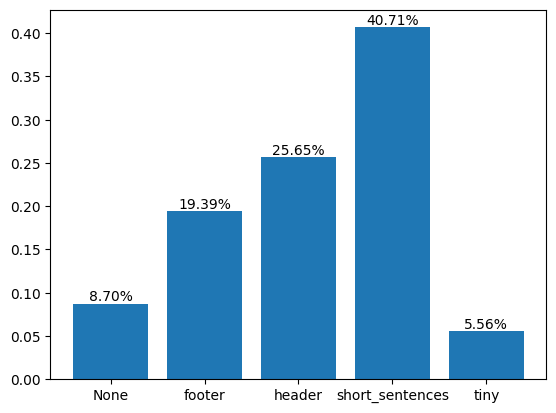

In [39]:
# Draw the bar chart for quality warning and put percentage on top of each bar
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(qw_count.keys(), [count/total for count in qw_count.values()])
for i, value in enumerate(qw_count.values()):
    ax.text(i, value/total, f"{value/total:.2%}", ha='center', va='bottom')

plt.show()


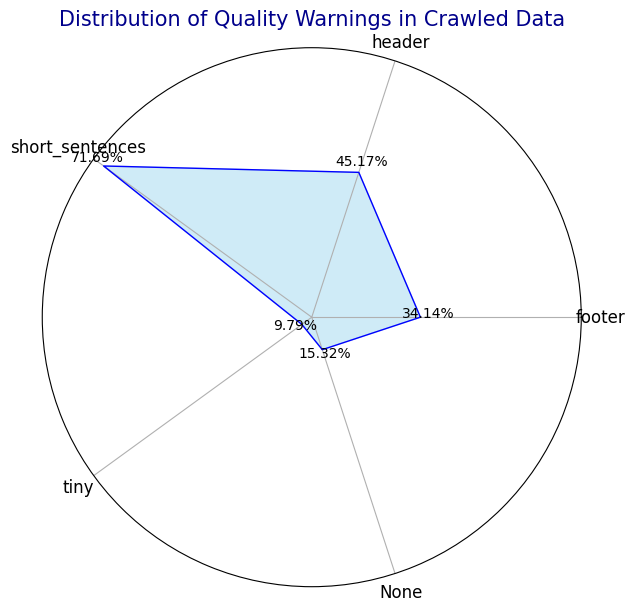

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the quality_warning count
# sort by value
# data = dict(sorted(qw_count.items(), key=lambda item: item[1], reverse=True))

# Preparing data for radar chart
categories = list(qw_count.keys())
values = list(qw_count.values())

# total_records = sum(values)
total_records = qw_df.shape[0]
proportions = [v / total_records * 100 for v in values]  # Convert to percentages

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
proportions += proportions[:1]  # Close the chart
angles += angles[:1]  # Close the chart

# Plotting
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.fill(angles, proportions, color='skyblue', alpha=0.4)
ax.plot(angles, proportions, color='blue', linewidth=1)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title('Distribution of Quality Warnings in Crawled Data', size=15, color='darkblue')

# Display values at each data point
for angle, proportion, category in zip(angles[:-1], proportions[:-1], categories):
    ax.text(angle, proportion + 2, f'{proportion:.2f}%', ha='center', color='black')

# Show the plot
plt.show()

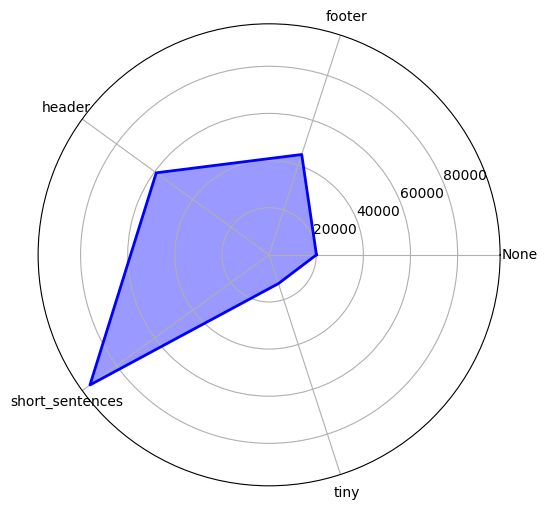

In [42]:
# Plot spider graph for qw_count and qw_df.shape[0] to see the distribution of quality warning
import matplotlib.pyplot as plt
import numpy as np

categories = list(qw_count.keys())
values = list(qw_count.values())

N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories, color='black', size=10)
ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='blue', alpha=0.4)

plt.show()


**Insights of Quality Waring:**
The radar chart visually represents the distribution of quality warnings in dataset. Here are some insights:
- **Dominace of Short Sentence**: Around 40.71% of the data is flagged with `short_sentence`. This might indicate that a significant portion of the data consists of brief, possibly incomplete or less informative text segments. For LLM training, this could impact the context and coherence of generated response. 
- **Headers and Footers**: `header` (25.65%) and `footer` (19.39%) make up a substaintial part of the dataset. These sections typically contain non-informative or repetitive content, like navigation, links or copyright notices, which may not be useful for model training.
- **Tiny Content**: `tiny` entries, accounting for 5.56%, likely consist of minimal text. Including these could hinder the model's ability to learn meaningful language patterns. 
- **Clean Data  (None)**: Only 8.70% of the data is without any quality warnings, suggesting that most of the cralwed content has some quality concerns. For effective LLM training, focusing on this clean subset or further refining the flagged data may be necessary.